# TC1002S Herramientas computacionales: el arte de la analítica

This is a notebook with all your work for the final evidence of this course


# Niveles de dominio a demostrar con la evidencia

### SING0202A

Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.


# Student information

- Name: Ana Valeria Guzmán Vázquez

- ID:A01643224

- My carreer:IRS


# Importing libraries

In [86]:


import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# PART 1

## Do clustering using your assigned dataset

## a) Load data

In [87]:
RunInColab          = True     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/MyDrive/A01643224_X.csv"

else:
    # Define path del proyecto
    Ruta            = ""

df = pd.read_csv(Ruta)
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,0,9.778356,3.475205,-6.029778,-5.287040,-5.429602,2.753834,3.578506,4.174633,4.304142,-7.320649
1,1,-5.802908,-3.400240,7.884945,8.148311,6.097669,4.776283,-6.819212,-6.998992,-9.690308,-2.385304
2,2,6.236679,5.911367,5.459355,-9.707039,-5.989161,1.874279,-0.364957,-7.444310,10.033878,1.490444
3,3,-5.652059,6.282338,-2.799424,7.237805,9.181349,-5.093717,-7.276537,8.638414,1.318273,-7.920166
4,4,11.042548,8.185530,-9.417514,3.203569,-5.743896,2.836404,7.516272,-6.166851,4.661550,6.074516
...,...,...,...,...,...,...,...,...,...,...,...
767,767,-3.965658,-3.930734,11.680974,5.896419,2.686829,4.601208,-2.268845,-10.090702,-8.555240,-5.061186
768,768,11.392142,8.118112,-8.069114,-9.654353,-6.445338,0.836215,9.032050,6.510328,5.381359,-9.364978
769,769,9.631710,9.543051,-2.990827,-7.978212,-4.062087,1.590519,1.549482,4.986313,8.703812,-12.146793
770,770,10.877704,5.584839,-6.818931,4.449676,-4.920867,5.381812,9.965202,-7.104736,1.714998,9.413020


## b) Data managment


Print the first 7 rows

In [88]:
print(df.head(7))

   Unnamed: 0         x1        x2        x3         x4        x5        x6  \
0           0   9.778356  3.475205 -6.029778  -5.287040 -5.429602  2.753834   
1           1  -5.802908 -3.400240  7.884945   8.148311  6.097669  4.776283   
2           2   6.236679  5.911367  5.459355  -9.707039 -5.989161  1.874279   
3           3  -5.652059  6.282338 -2.799424   7.237805  9.181349 -5.093717   
4           4  11.042548  8.185530 -9.417514   3.203569 -5.743896  2.836404   
5           5   9.806116  8.805701  2.662602 -13.828428 -4.996750  0.125286   
6           6   9.829254  7.429611 -8.673050  -7.360726 -3.102476  1.085068   

         x7        x8         x9        x10  
0  3.578506  4.174633   4.304142  -7.320649  
1 -6.819212 -6.998992  -9.690308  -2.385304  
2 -0.364957 -7.444310  10.033878   1.490444  
3 -7.276537  8.638414   1.318273  -7.920166  
4  7.516272 -6.166851   4.661550   6.074516  
5 -1.792784 -7.360830   8.341818   4.198737  
6  4.755329  3.698032   6.230018 -10.247118  

Print the last 4 rows

In [89]:
print(df.tail(4))

     Unnamed: 0         x1        x2        x3         x4        x5        x6  \
768         768  11.392142  8.118112 -8.069114  -9.654353 -6.445338  0.836215   
769         769   9.631710  9.543051 -2.990827  -7.978212 -4.062087  1.590519   
770         770  10.877704  5.584839 -6.818931   4.449676 -4.920867  5.381812   
771         771   7.220602  5.952618  2.148995 -11.109460 -7.878972  2.155042   

           x7        x8         x9        x10  
768  9.032050  6.510328   5.381359  -9.364978  
769  1.549482  4.986313   8.703812 -12.146793  
770  9.965202 -7.104736   1.714998   9.413020  
771 -1.923405 -7.399080  10.045507   4.689936  


How many rows and columns are in your data?

Use the `shape` method


In [90]:
print(df.shape)

(772, 11)


Print the name of all columns

Use the `columns` method

In [91]:
df.columns


Index(['Unnamed: 0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10'],
      dtype='object')

What is the data type in each column

Use the `dtypes` method

In [92]:
df.dtypes

,0
Unnamed: 0,int64
x1,float64
x2,float64
x3,float64
x4,float64
x5,float64
x6,float64
x7,float64
x8,float64
x9,float64


What is the meaning of rows and columns?

Your responses here

1.771 y 10 columnas

2. el nombre de las columnas son Unnamed: 0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10'

3. es object el dytype

4. el significado de rows y columns se refiere a las diferentes formas de checar la tabla, columns son columnas de arriba a abajo van y se cuentan de izquierda a derecha y rows son filas y van de izquierda a derecha y se cuentan de arriba a abajo.

...

Print a statistical summary of your columns


In [93]:
print(df.describe())

       Unnamed: 0          x1          x2          x3          x4          x5  \
count  772.000000  772.000000  772.000000  772.000000  772.000000  772.000000   
mean   385.500000    2.904373    4.823018   -1.263375   -0.055121    0.212734   
std    223.001495    7.874455    4.987566    6.741288    7.784165    6.121346   
min      0.000000  -13.315934  -10.420970  -15.317346  -16.277779   -9.661029   
25%    192.750000   -5.491706    3.237926   -6.694124   -8.253960   -4.738888   
50%    385.500000    7.077057    6.184042   -2.536932    2.383943   -2.419899   
75%    578.250000    9.653860    8.204728    2.301091    6.689638    5.553771   
max    771.000000   14.980341   13.800582   14.197823   14.432440   15.241363   

               x6          x7          x8          x9         x10  
count  772.000000  772.000000  772.000000  772.000000  772.000000  
mean     0.490662    0.052573   -1.911937    2.240251   -3.234664  
std      5.112953    4.869673    7.322025    5.507512    5.853907 

1. What is the minumum and maximum values of each variable:
 El minimo es  0.000000  -13.315934  -10.420970  -15.317346  -16.277779   -9.661029   -14.268469  -10.240442  -12.983262  -11.231671  -14.923648  

 el maximo 771.000000   14.980341   13.800582   14.197823   14.432440   15.241363   9.757031   12.043993   13.834710   14.206079    9.413020  

2. What is the mean and standar deviation of each variable:
the mean is 385.500000    2.904373    4.823018   -1.263375   -0.055121    0.212734    0.490662    0.052573   -1.911937    2.240251   -3.234664  

and the std is 223.001495    7.874455    4.987566    6.741288    7.784165    6.121346   5.112953    4.869673    7.322025    5.507512    5.853907  

3. What the 25%, 50% and 75% represent?:
el 25 es el valor por debajo se encuentra el 25% de los datos.
el 50 es el valor central de los datos
el 75 valor debajo se encuentra el 75 % de los datos.

Rename the columns using the same name with capital letters

In [94]:
df.columns = [col.upper() for col in df.columns]
print(df.head())


   UNNAMED: 0         X1        X2        X3        X4        X5        X6  \
0           0   9.778356  3.475205 -6.029778 -5.287040 -5.429602  2.753834   
1           1  -5.802908 -3.400240  7.884945  8.148311  6.097669  4.776283   
2           2   6.236679  5.911367  5.459355 -9.707039 -5.989161  1.874279   
3           3  -5.652059  6.282338 -2.799424  7.237805  9.181349 -5.093717   
4           4  11.042548  8.185530 -9.417514  3.203569 -5.743896  2.836404   

         X7        X8         X9       X10  
0  3.578506  4.174633   4.304142 -7.320649  
1 -6.819212 -6.998992  -9.690308 -2.385304  
2 -0.364957 -7.444310  10.033878  1.490444  
3 -7.276537  8.638414   1.318273 -7.920166  
4  7.516272 -6.166851   4.661550  6.074516  


Rename the columns to their original names

In [95]:
df.columns = [col.lower() for col in df.columns]
print(df.head())


   unnamed: 0         x1        x2        x3        x4        x5        x6  \
0           0   9.778356  3.475205 -6.029778 -5.287040 -5.429602  2.753834   
1           1  -5.802908 -3.400240  7.884945  8.148311  6.097669  4.776283   
2           2   6.236679  5.911367  5.459355 -9.707039 -5.989161  1.874279   
3           3  -5.652059  6.282338 -2.799424  7.237805  9.181349 -5.093717   
4           4  11.042548  8.185530 -9.417514  3.203569 -5.743896  2.836404   

         x7        x8         x9       x10  
0  3.578506  4.174633   4.304142 -7.320649  
1 -6.819212 -6.998992  -9.690308 -2.385304  
2 -0.364957 -7.444310  10.033878  1.490444  
3 -7.276537  8.638414   1.318273 -7.920166  
4  7.516272 -6.166851   4.661550  6.074516  


Use two different alternatives to get one of the columns

In [96]:
#columna_x1 = df["x1"]
#print(columna_x1)

columna_x1 = df.x1
print(columna_x1)


0       9.778356
1      -5.802908
2       6.236679
3      -5.652059
4      11.042548
         ...    
767    -3.965658
768    11.392142
769     9.631710
770    10.877704
771     7.220602
Name: x1, Length: 772, dtype: float64


Get a slice of your data set: second and thrid columns and rows from 62 to 72

In [97]:
slice_df = df.iloc[62:73, 1:3]
print(slice_df)


           x1        x2
62   7.168549  5.941954
63  -5.960849 -2.984927
64  -5.086422  5.317624
65  10.213768  8.661101
66   7.047098  6.462342
67  11.911433  6.235519
68   6.826733  9.088322
69  11.661271  9.514228
70  -4.688439 -0.843699
71   5.904572  8.432417
72   5.374750  5.952496


For the second and thrid columns, calculate the number of null and not null values and verify that their sum equals the total number of rows

In [98]:
total_rows = len(df)

null_column2 = df['x1'].isnull().sum()
null_column3 = df['x2'].isnull().sum()

not_null_column2 = total_rows - null_column2
not_null_column3 = total_rows - null_column3

assert (null_column2 + not_null_column2 == total_rows)
assert (null_column3 + not_null_column3 == total_rows)

print(f"Column2 - Null: {null_column2}, Not Null: {not_null_column2}")
print(f"Column3 - Null: {null_column3}, Not Null: {not_null_column3}")

Column2 - Null: 0, Not Null: 772
Column3 - Null: 0, Not Null: 772


Discard the last column


In [99]:
df = df.iloc[:, :-1]
df

,unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,x9
0,0,9.778356,3.475205,-6.029778,-5.287040,-5.429602,2.753834,3.578506,4.174633,4.304142
1,1,-5.802908,-3.400240,7.884945,8.148311,6.097669,4.776283,-6.819212,-6.998992,-9.690308
2,2,6.236679,5.911367,5.459355,-9.707039,-5.989161,1.874279,-0.364957,-7.444310,10.033878
3,3,-5.652059,6.282338,-2.799424,7.237805,9.181349,-5.093717,-7.276537,8.638414,1.318273
4,4,11.042548,8.185530,-9.417514,3.203569,-5.743896,2.836404,7.516272,-6.166851,4.661550
...,...,...,...,...,...,...,...,...,...,...
767,767,-3.965658,-3.930734,11.680974,5.896419,2.686829,4.601208,-2.268845,-10.090702,-8.555240
768,768,11.392142,8.118112,-8.069114,-9.654353,-6.445338,0.836215,9.032050,6.510328,5.381359
769,769,9.631710,9.543051,-2.990827,-7.978212,-4.062087,1.590519,1.549482,4.986313,8.703812
770,770,10.877704,5.584839,-6.818931,4.449676,-4.920867,5.381812,9.965202,-7.104736,1.714998


### Questions

Based on the previos results, provide a full description of yout dataset

Your response:

Es una tabla que consta de 772 filas y 11 columnas contando la de los titulos asi como consta de titulos en las columnas que son numeros con x previas.



## c) Data visualization

Plot in the histogram of one of the variables

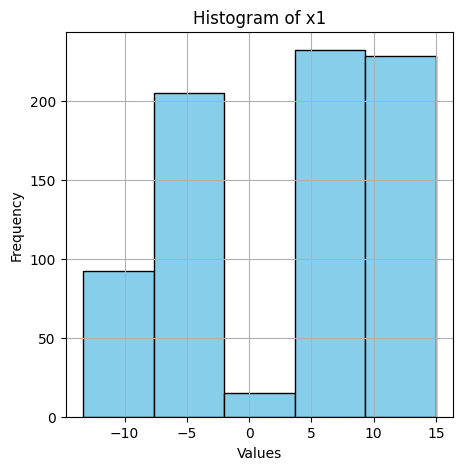

In [100]:
plt.figure(figsize=(5, 5))
plt.hist(df['x1'].dropna(), bins=5, color='skyblue', edgecolor='black')
plt.title('Histogram of x1')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Plot in the same figure the histogram of two variables



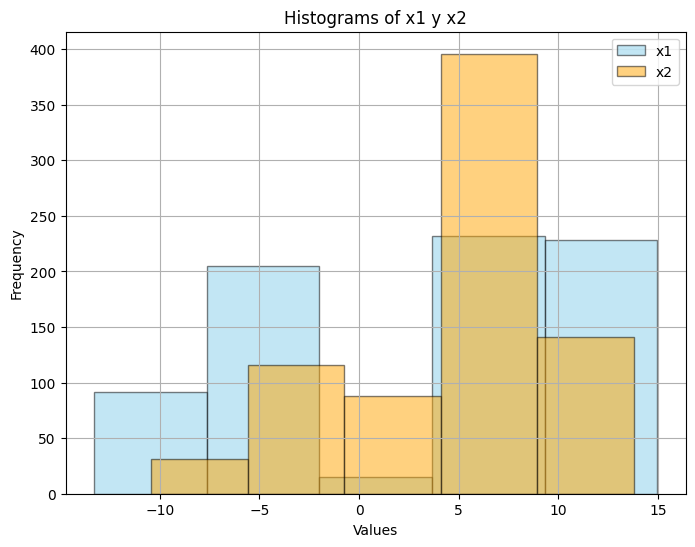

In [101]:
plt.figure(figsize=(8, 6))
plt.hist(df['x1'].dropna(), bins=5, alpha=0.5, label='x1', color='skyblue', edgecolor='black')
plt.hist(df['x2'].dropna(), bins=5, alpha=0.5, label='x2', color='orange', edgecolor='black')
plt.title('Histograms of x1 y x2')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

Based on these plots, provide a description of your data:

Your response here:
Se puede observar que los valores naranjas tuvieron mas frecuencia en valores entre el 5 y 10 a comparacion de los azules que estuvieron mas distribuidos.

Plot the boxplot of one of the variables

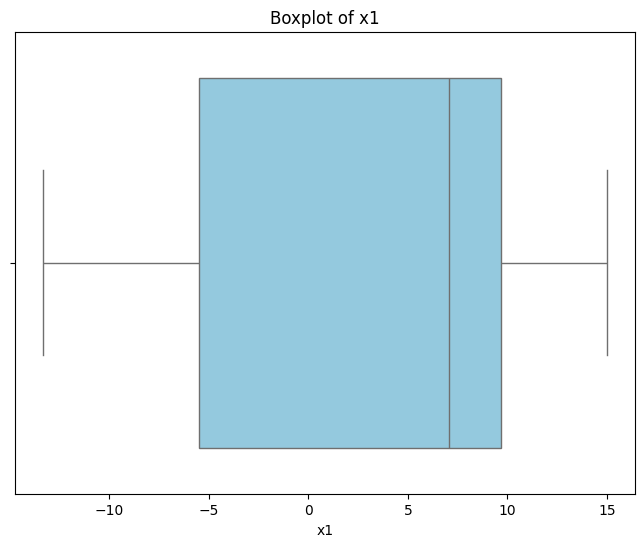

In [102]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='x1', color='skyblue')
plt.title('Boxplot of x1')
plt.xlabel('x1')
plt.show()


Plot in the same figure the boxplot of two variables

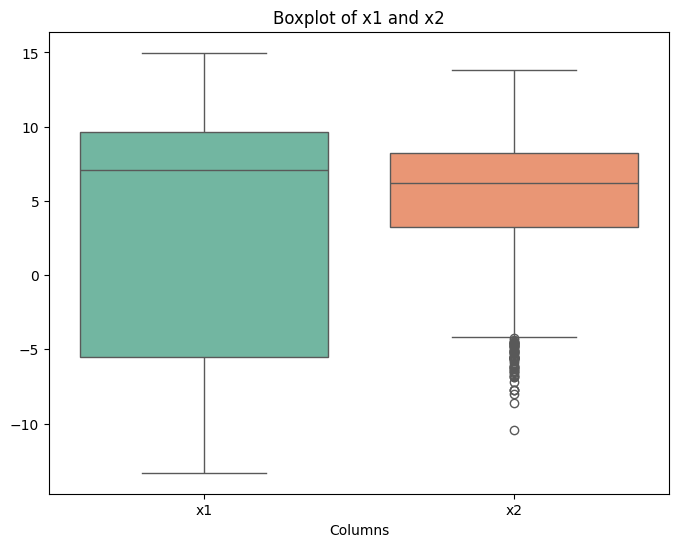

In [103]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['x1', 'x2']], palette="Set2")
plt.title('Boxplot of x1 and x2')
plt.xlabel('Columns')
plt.show()


Based on these plots, provide a description of your data:

Your response here: Se puede observar que x2 tiene un menor rango de valores  a comparacion de x1.

Plot the scatter plot between all pair of variables

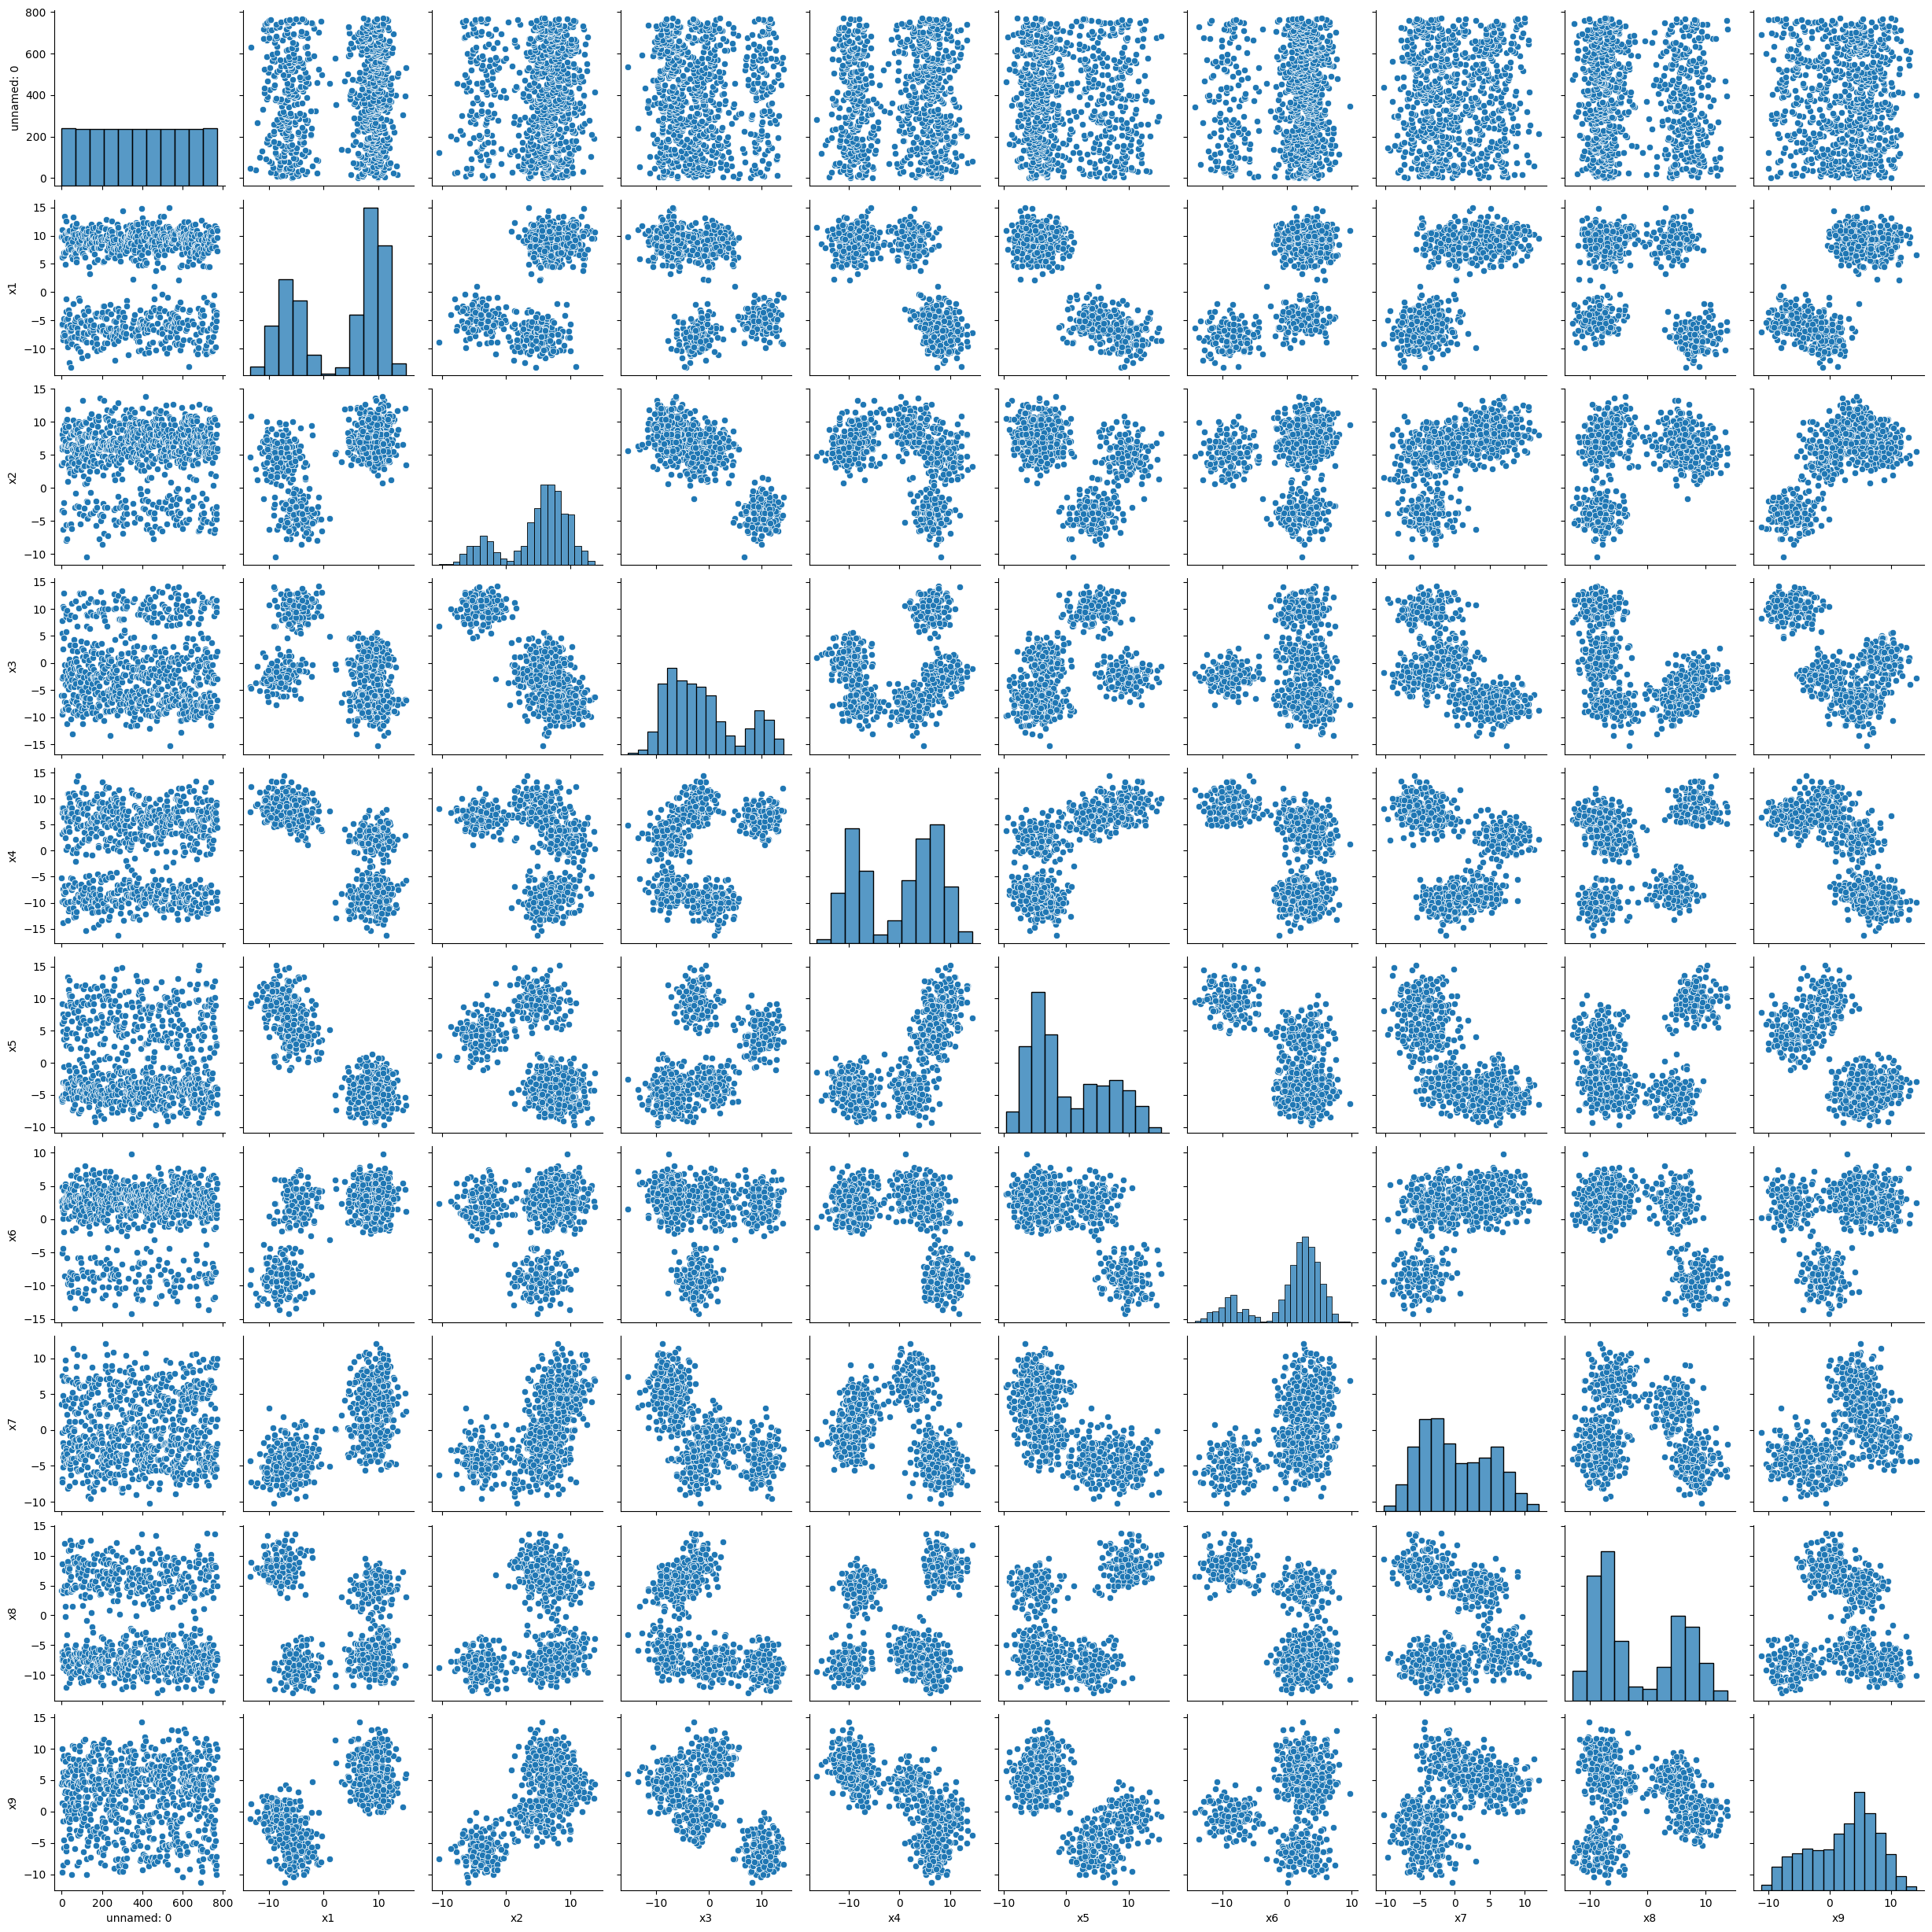

In [104]:
sns.pairplot(df)
plt.show()

### Questions

Based on the previos plots, provide a full description of yout dataset

Your response: con las ultimas imagenes nos enseñan las diversas graficas en una misma imagen




## d) Kmeans

Do Kmeans clustering assuming a number of clusters accorging to your scatter plots

In [105]:
data = df.drop(df.columns[0], axis=1)

# Estandarizar los datos (K-means es sensible a la escala de los datos)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Realizar K-means clustering
k = 10# Número de clusters (ajusta según los scatter plots)
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data_scaled)


KMeans(n_clusters=10, random_state=42)

Add to your dataset a column with the estimated cluster to each data point

In [106]:
data['Cluster'] = kmeans.labels_

Print the number associated to each cluster

In [107]:
print("Número de puntos en cada cluster:")
print(data['Cluster'].value_counts())

Número de puntos en cada cluster:
Cluster
5    153
8     82
7     82
4     79
2     76
0     74
3     72
6     60
1     48
9     46
Name: count, dtype: int64


Print the centroids

In [108]:
print("\nCentroids:")
centroids_original_scale = scaler.inverse_transform(kmeans.cluster_centers_)
print(centroids_original_scale)


Centroids:
[[ 2.18135135e+02  9.34174492e+00  9.20882293e+00 -7.66156551e+00
   2.18360338e+00 -4.44412990e+00  3.79622343e+00  7.11794888e+00
  -6.14989984e+00  4.18974330e+00]
 [ 4.49562500e+02 -4.60229662e+00 -3.42780205e+00  1.01287644e+01
   6.34338517e+00  4.56738418e+00  1.68956198e+00 -2.92946499e+00
  -8.62538576e+00 -6.29428753e+00]
 [ 5.66105263e+02 -8.10380831e+00  5.42270518e+00 -2.42353445e+00
   8.34145918e+00  9.74786609e+00 -8.84605982e+00 -4.90566725e+00
   8.11574579e+00 -1.07244669e+00]
 [ 5.73486111e+02  8.74003163e+00  6.19846798e+00  6.77388090e-01
  -9.96191541e+00 -3.44198996e+00  2.93012277e+00 -1.41176064e+00
  -8.13816319e+00  9.01271020e+00]
 [ 1.63683544e+02 -7.52563142e+00  4.76774225e+00 -2.39178785e+00
   8.87200305e+00  9.42227240e+00 -8.75915115e+00 -4.58316742e+00
   8.63350870e+00 -2.89122851e-01]
 [ 3.68124183e+02  9.23096992e+00  7.83540125e+00 -7.01120303e+00
  -7.75807856e+00 -5.04853873e+00  2.59543885e+00  3.31301669e+00
   4.70264893e+00  4.

Print the intertia metric

In [109]:
print("\nInertia Metric:")
print(kmeans.inertia_)


Inertia Metric:
1071.3547684733637


Plot a scatter plot of your data using different color for each cluster. Also plot the centroids

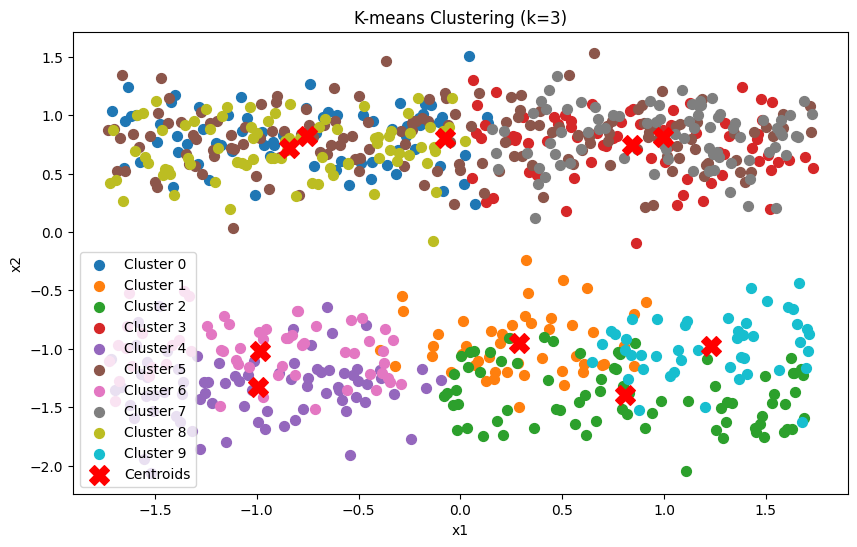

In [110]:
plt.figure(figsize=(10, 6))
for cluster in range(k):
    # Plot points for each cluster
    plt.scatter(
        data_scaled[data['Cluster'] == cluster, 0],  # First variable
        data_scaled[data['Cluster'] == cluster, 1],  # Second variable
        label=f'Cluster {cluster}',
        s=50
    )
plt.scatter(
    kmeans.cluster_centers_[:, 0],  # First variable
    kmeans.cluster_centers_[:, 1],  # Second variable
    marker='X',  # Marker for centroids
    s=200,  # Size of the marker
    c='red',  # Color of the centroids
    label='Centroids'
)
plt.title('K-means Clustering (k=3)')
plt.xlabel(data.columns[0])  # First variable
plt.ylabel(data.columns[1])  # Second variable
plt.legend()
plt.show()



### Questions

Provides a detailed description of your results

Your response:
Se puede observar que de los 10 clusters hay varios que tienen los centroides muy cerca al igual se puede observar que estos clusters se encuentran o muy arriba o muy abajo dejando en la parte central muy solo.

## d) Elbow plot

Compute the Elbow plot

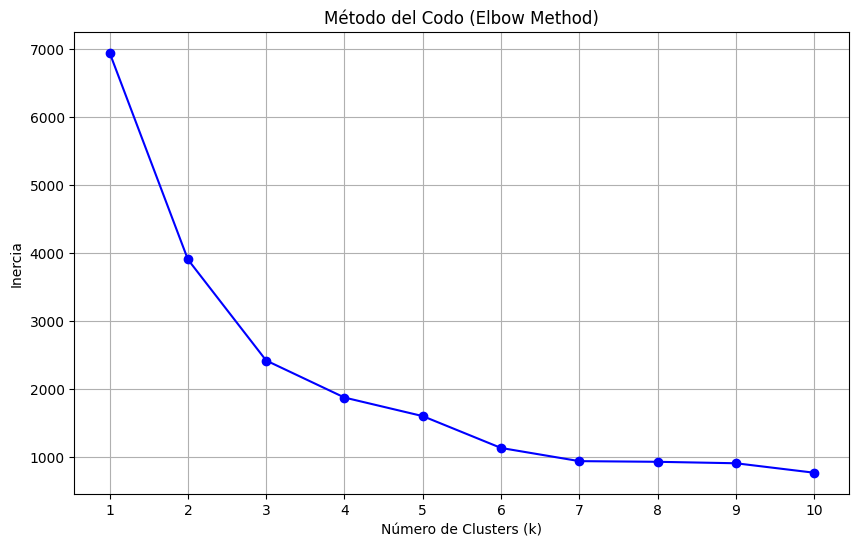

In [111]:
data = data.drop(data.columns[0], axis=1)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Calcular la inercia para diferentes valores de k
inertia = []
k_values = range(1, 11)


for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)  # Inercia es la suma de las distancias al cuadrado al centroide más cercano

# Graficar el Elbow Plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o', linestyle='-', color='b')
plt.title('Método del Codo (Elbow Method)')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

### Questions

What is the best number of clusters K? (argue your response)

Your response: 10 clusters me parece una buena cantidad ya que permite ver las graficas con mas detalles.


Does this number of clusters agree with your inital guess? (argue your response, no problem at all if they do not agree)

Your response:Al hacer la primera grafica habia puesto 3 pero me di cuenta que 3 no era buena idea para la segunda grafica por ello decidi aumentar el numero en ambas a 10 lo cual permite tener una mejor perspectiva de las graficas


# PART 2

## Do clustering using the "digits" dataset

1) Load the dataset from "sklearn.datasets"


In [112]:
digits = load_digits()
X = digits.data
y = digits.target


2) Plot some of the observations (add in the title the label/digit of that obserbation)

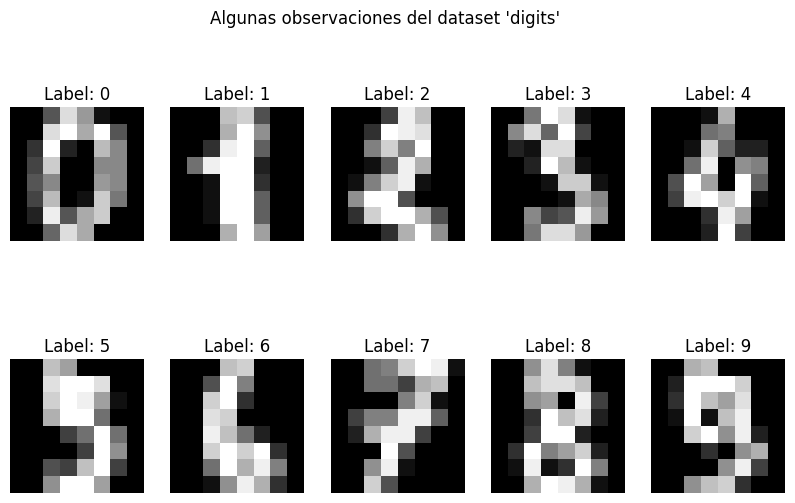

In [113]:
plt.figure(figsize=(10, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i].reshape(8, 8), cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')
plt.suptitle("Algunas observaciones del dataset 'digits'")
plt.show()


3) Do K means clustering in the following cases:

* KmeansAll: Using all 64 variables/pixels/features

* Kmeans1row: Using only the 8 variables/pixels/features from the firt row

* Kmeans4row: Using only the 8 variables/pixels/features from the fourth row

* Kmeans8row: Using only the 8 variables/pixels/
features from the eighth row


In [114]:
scaler = StandardScaler()

# KmeansAll: Usando todas las 64 variables/píxeles
X_scaled_all = scaler.fit_transform(X)
kmeans_all = KMeans(n_clusters=10, random_state=42)  # 10 clusters (uno por cada dígito)
kmeans_all.fit(X_scaled_all)

# Kmeans1row: Usando solo las 8 variables/píxeles de la primera fila
X_first_row = X[:, :8]  # Primeras 8 columnas (primera fila de píxeles)
X_scaled_first_row = scaler.fit_transform(X_first_row)
kmeans_first_row = KMeans(n_clusters=10, random_state=42)
kmeans_first_row.fit(X_scaled_first_row)

# Kmeans4row: Usando solo las 8 variables/píxeles de la cuarta fila
X_fourth_row = X[:, 24:32]  # Columnas 24 a 31 (cuarta fila de píxeles)
X_scaled_fourth_row = scaler.fit_transform(X_fourth_row)
kmeans_fourth_row = KMeans(n_clusters=10, random_state=42)
kmeans_fourth_row.fit(X_scaled_fourth_row)

# Kmeans8row: Usando solo las 8 variables/píxeles de la octava fila
X_eighth_row = X[:, 56:64]  # Columnas 56 a 63 (octava fila de píxeles)
X_scaled_eighth_row = scaler.fit_transform(X_eighth_row)
kmeans_eighth_row = KMeans(n_clusters=10, random_state=42)
kmeans_eighth_row.fit(X_scaled_eighth_row)

KMeans(n_clusters=10, random_state=42)

4) Verify your results. Plot several observations from the same digit and add in the title the real label and the estimated label to check in what observations the clusterization was correct or incorrect

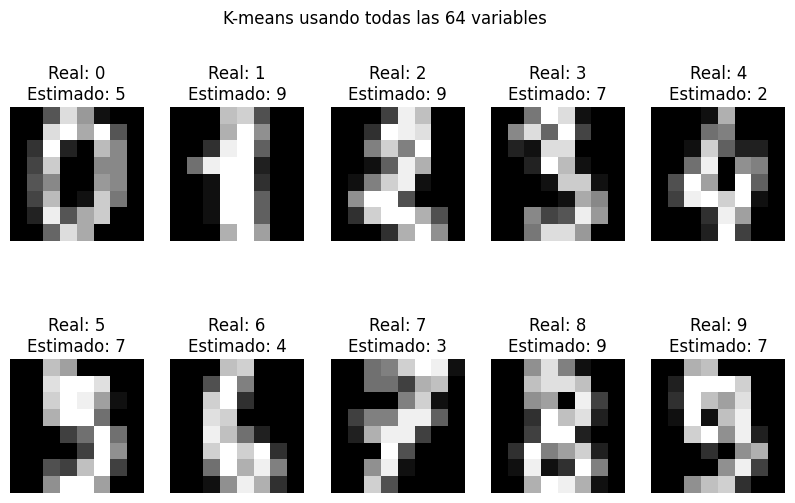

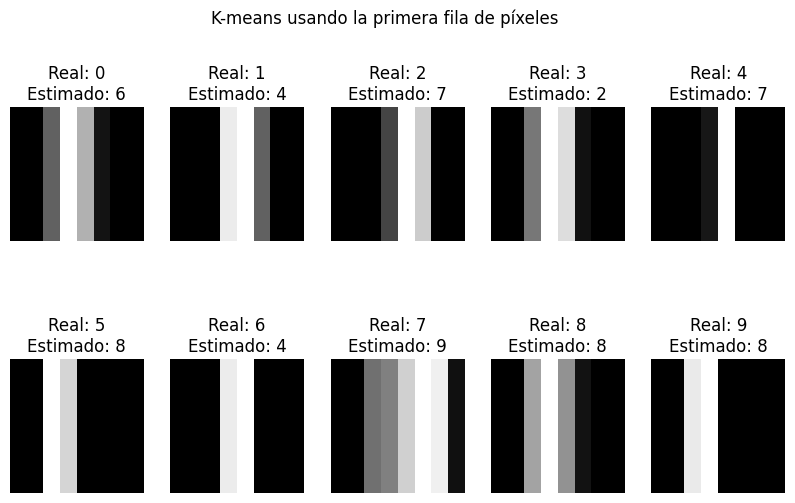

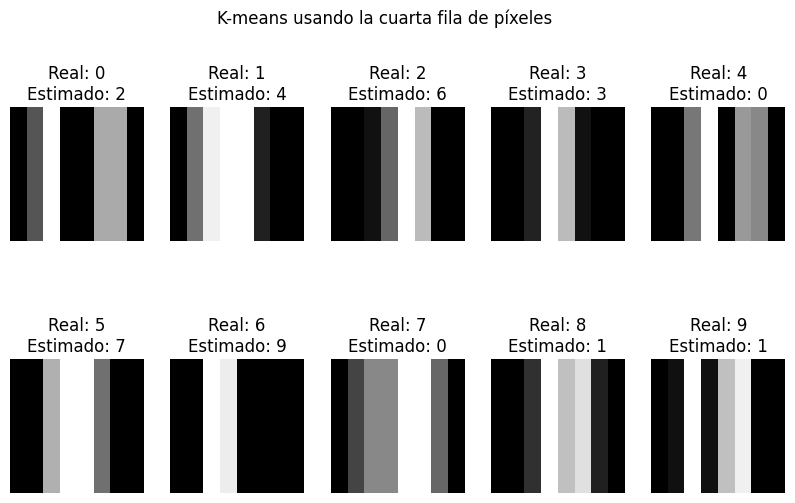

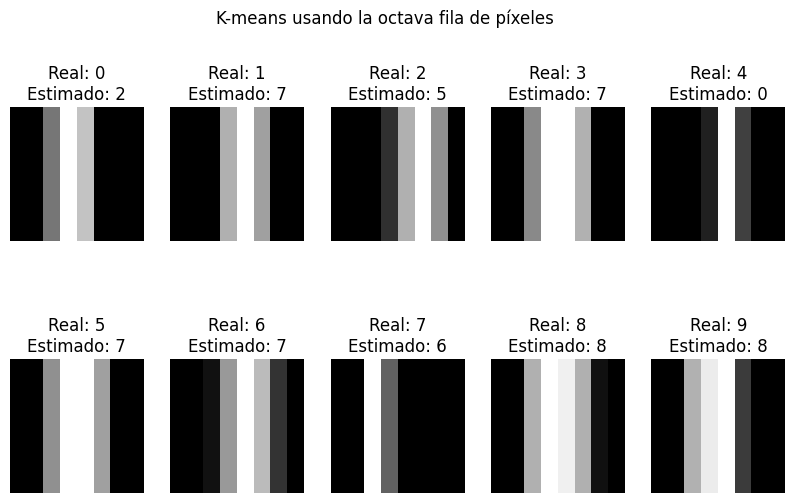

In [115]:

def plot_cluster_results(X, y, kmeans, title, use_full_image=True):
    plt.figure(figsize=(10, 6))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        if use_full_image:
            # Si se usa la imagen completa (64 variables)
            plt.imshow(X[i].reshape(8, 8), cmap='gray')
        else:
            # Si se usa solo una fila de píxeles (8 variables)
            plt.imshow(np.tile(X[i], (8, 1)), cmap='gray')  # Repetir la fila para visualización
        plt.title(f"Real: {y[i]}\nEstimado: {kmeans.labels_[i]}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Llamadas a la función
plot_cluster_results(X, y, kmeans_all, "K-means usando todas las 64 variables", use_full_image=True)
plot_cluster_results(X_first_row, y, kmeans_first_row, "K-means usando la primera fila de píxeles", use_full_image=False)
plot_cluster_results(X_fourth_row, y, kmeans_fourth_row, "K-means usando la cuarta fila de píxeles", use_full_image=False)
plot_cluster_results(X_eighth_row, y, kmeans_eighth_row, "K-means usando la octava fila de píxeles", use_full_image=False)

5) Compute the Elbow plot

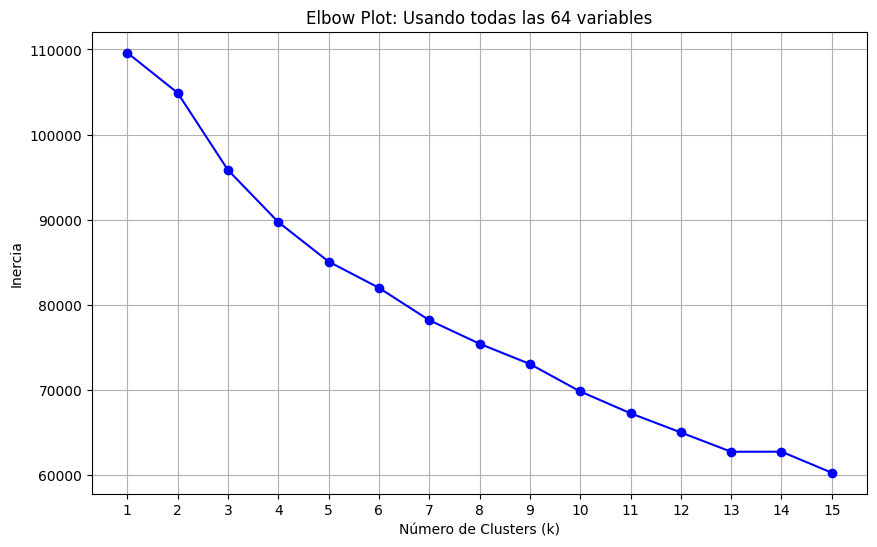

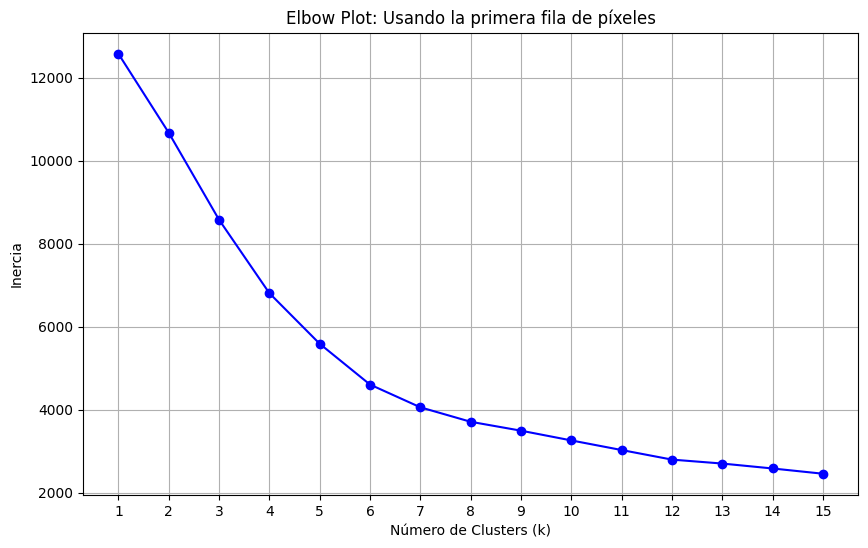

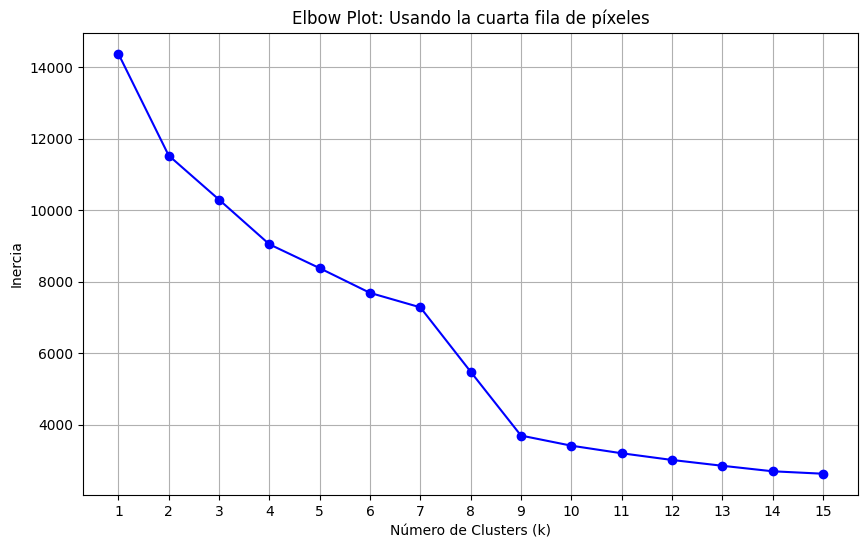

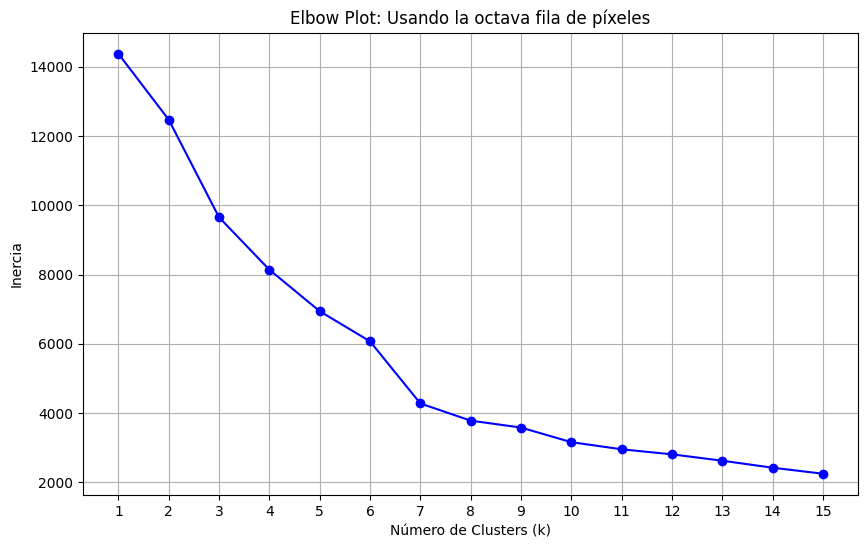

In [116]:
def plot_elbow(X_scaled, title):
    inertia = []
    k_values = range(1, 16)  # Probar k desde 1 hasta 15

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_scaled)
        inertia.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(k_values, inertia, marker='o', linestyle='-', color='b')
    plt.title(f'Elbow Plot: {title}')
    plt.xlabel('Número de Clusters (k)')
    plt.ylabel('Inercia')
    plt.xticks(k_values)
    plt.grid(True)
    plt.show()

# Graficar Elbow Plot para cada caso
plot_elbow(X_scaled_all, "Usando todas las 64 variables")
plot_elbow(X_scaled_first_row, "Usando la primera fila de píxeles")
plot_elbow(X_scaled_fourth_row, "Usando la cuarta fila de píxeles")
plot_elbow(X_scaled_eighth_row, "Usando la octava fila de píxeles")

### Questions

Provides a detailed description of your results (e.g., in which case the clusterization is better, with KmeansAll, Kmeans1row, Kmeans4row, or Kmeans8row).

Your response (argue your response): Usando todas las variables es la mejor ya que tiene mayor detalle porque contiene todas y cada una de las variables a comparacion de las otras.

# PART 3
## Do classification using the "digits" dataset

1) Load the dataset from "sklearn.datasets"

In [117]:
digits = load_digits()
X = digits.data  # Features (64 pixels)
y = digits.target  # Labels (digits 0-9)

2) Plot some of the observations  (add in the title the label/digit of that obserbation)

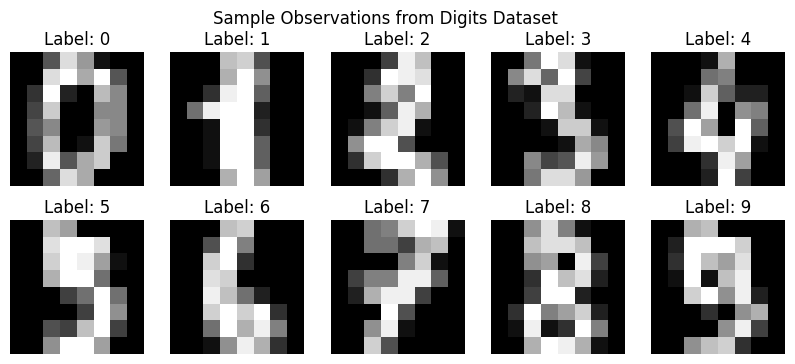

In [118]:
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i].reshape(8, 8), cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')
plt.suptitle("Sample Observations from Digits Dataset")
plt.show()

3) Split the dataset in train and test

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


4) Tune a classifier (Use the train set) in the following cases:

* ClassifierAll: Using all 64 variables/pixels/features

* Classifier1col: Using only the 8 variables/pixels/features from the firt column

* Classifier4col: Using only the 8 variables/pixels/features from the fourth column

* Classifier8col: Using only the 8 variables/pixels/
features from the eighth column

Note: in these four cases always use the same classification algorithm, e.g., a Suport Vector Machine


In [120]:
# ClassifierAll: Using all 64 features
classifier_all = SVC(kernel='linear', random_state=42)
classifier_all.fit(X_train, y_train)

# Classifier1col: Using only the first column (8 features)
X_train_1col = X_train[:, :8]  # First 8 features (first column)
X_test_1col = X_test[:, :8]
classifier_1col = SVC(kernel='linear', random_state=42)
classifier_1col.fit(X_train_1col, y_train)

# Classifier4col: Using only the fourth column (8 features)
X_train_4col = X_train[:, 24:32]  # Features 24-31 (fourth column)
X_test_4col = X_test[:, 24:32]
classifier_4col = SVC(kernel='linear', random_state=42)
classifier_4col.fit(X_train_4col, y_train)

# Classifier8col: Using only the eighth column (8 features)
X_train_8col = X_train[:, 56:64]  # Features 56-63 (eighth column)
X_test_8col = X_test[:, 56:64]
classifier_8col = SVC(kernel='linear', random_state=42)
classifier_8col.fit(X_train_8col, y_train)

SVC(kernel='linear', random_state=42)

5) Make predictions (use the test set)

In [121]:
y_pred_all = classifier_all.predict(X_test)
y_pred_1col = classifier_1col.predict(X_test_1col)
y_pred_4col = classifier_4col.predict(X_test_4col)
y_pred_8col = classifier_8col.predict(X_test_8col)


6) Compute performance metrics

In [122]:
print("ClassifierAll Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_all):.4f}")
print(classification_report(y_test, y_pred_all))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_all))

print("\nClassifier1col Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_1col):.4f}")
print(classification_report(y_test, y_pred_1col))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_1col))

print("\nClassifier4col Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_4col):.4f}")
print(classification_report(y_test, y_pred_4col))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_4col))

print("\nClassifier8col Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_8col):.4f}")
print(classification_report(y_test, y_pred_8col))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_8col))

ClassifierAll Performance:
Accuracy: 0.9796
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.98      0.98      0.98        50
           2       0.98      1.00      0.99        47
           3       1.00      0.96      0.98        54
           4       0.98      0.98      0.98        60
           5       0.97      0.97      0.97        66
           6       1.00      1.00      1.00        53
           7       0.96      0.98      0.97        55
           8       0.95      0.98      0.97        43
           9       0.97      0.95      0.96        59

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540

Confusion Matrix:
 [[53  0  0  0  0  0  0  0  0  0]
 [ 0 49  0  0  0  0  0  0  1  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  1 52  0  1  0  0  0  0]
 [ 0  1  0  0 59  0  0  0  0  0]
 [ 0  0  0  0

7) Verify your results. Plot several observations from the same digit and add in the title the real label and the estimated label to check in what observations the classification was correct or incorrect

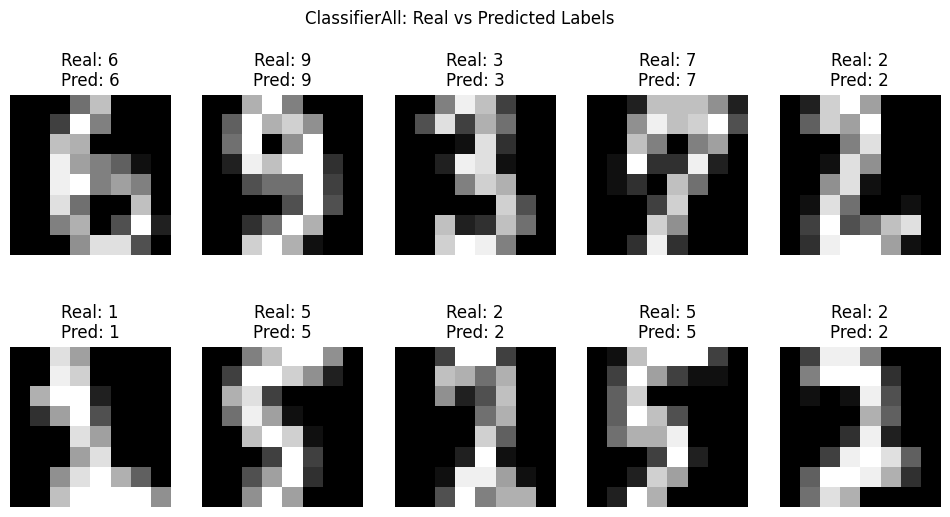

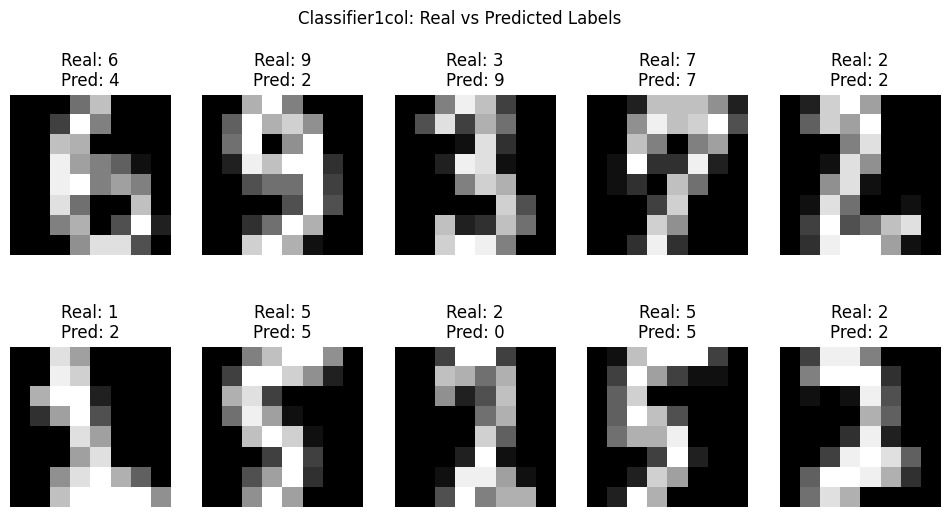

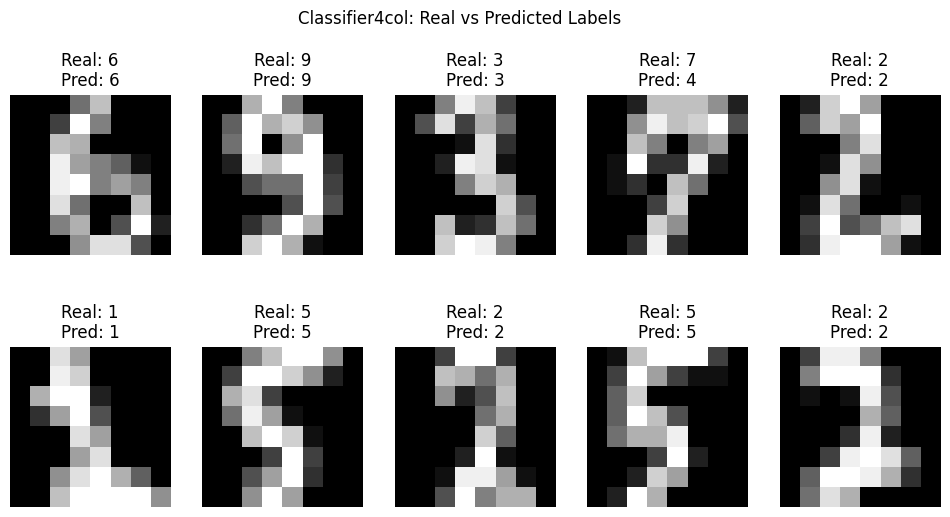

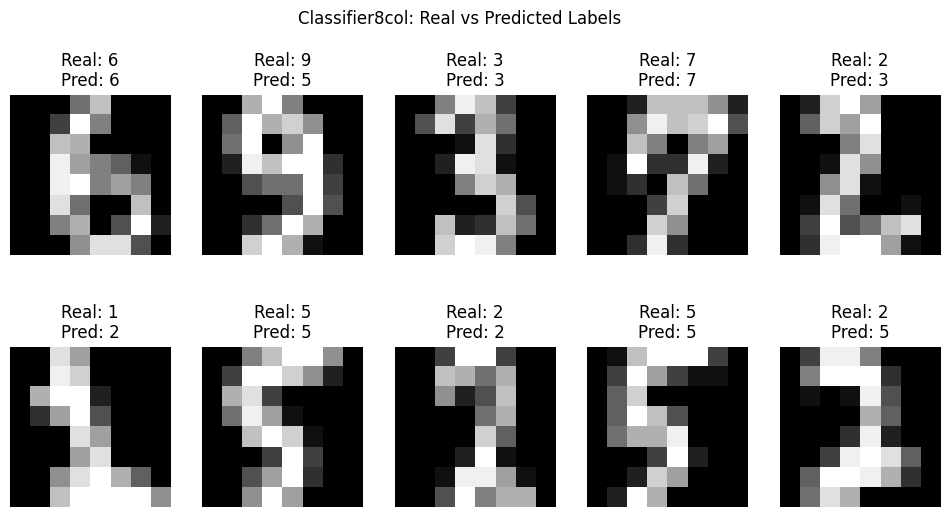

In [123]:
def plot_verification(X_test, y_test, y_pred, title):
    plt.figure(figsize=(12, 6))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(X_test[i].reshape(8, 8), cmap='gray')
        plt.title(f"Real: {y_test[i]}\nPred: {y_pred[i]}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Plot results for ClassifierAll
plot_verification(X_test, y_test, y_pred_all, "ClassifierAll: Real vs Predicted Labels")

# Plot results for Classifier1col
plot_verification(X_test, y_test, y_pred_1col, "Classifier1col: Real vs Predicted Labels")

# Plot results for Classifier4col
plot_verification(X_test, y_test, y_pred_4col, "Classifier4col: Real vs Predicted Labels")

# Plot results for Classifier8col
plot_verification(X_test, y_test, y_pred_8col, "Classifier8col: Real vs Predicted Labels")



### Questions

Provides a detailed description of your results (e.g., in which case the classification performance is better, with ClassifierAll, Classifier1col, Classifier4col, or Classifier8col).

Your response (argue your response):Al igual que el anterior el All es el mejor ya que es mas preciso porque contiene todos los datos necesarios .

# PART 4

## Descripción de tu percepcion del nivel de desarrollo de la subcompetencia

### SING0202A Interpretación de variables


Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Interpreta interacciones**. Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo.

Tu respuesta:Siento que esta parte si la pude desarrollar de buena manera ya que puedo entender de mejor manera las estructuras, los codigos y mas que nada el que realiza cada una de las lineas y como implementarlas

Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Construcción de modelos**. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.

Tu respuesta:

Esta competencia siento tambien como mencionaba anteriormente que si la pude lograr ya que pude entender y aplicar lo aprendido en el transcurso de la semana en esta evidencia pero mas que nada aprendi en que se puede aplicar.